## Abstract

### Resumen
- En el dataset 
#### Descripción de columnas
- StudentID: Identificador único de estudiantes
#### Detalles demograficos
- Age: La edad de los estudiantes entre los rangos de 15 a 18 años.
- Gender: Genero de los estudiantes, donde 0 representa masculino y 1 representa femenino.
- Ethnicity: La etnia de los estudiantes, codificados como:
    - 0: Caucasico
    - 1: Afroamericano
    - 2: Asiatico
    - 3: Otro
- ParentalEducation: Nivel Educacional de los padres, codificados como:
    - 0: Ninguno
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher
#### Hábitos de Estudio
- StudyTimeWeekly: Estudio semanal de tiempo en horas, entre 0 a 20.
- Absences: Numero de ausencias durante el año escolar, rango de 0 a 30.
- Tutoring: Estado de tutorias, donde 0 indica no y 1 si.
- Participación de los padres
- ParentalSupport: Nivel de apoyo de los padres, codificado como:
    - 0: Ninguno
    - 1: Bajo
    - 2: Moderado
    - 3: Alto
    - 4: Muy alto
#### Actividades extracurriculares
- Extracurricular: Participación en actividades extracurriculares, donde 0 indica no y 1 indica si.
- Sports: Participacion en deportes, donde 0 indica no y 1 indica si.
- Music: Participacion en actividades musicales, donde 0 indica no y 1 indica si.
- Volunteering: Participacion en voluntariado, donde 0 indica no y 1 indica si.
#### Rendimiento academico
- GPA: Promedio de calificaciones en una escala de 2.0 a 4.0 , influenciado por los habitos de estudio, participacion de los padres y actividades extracurriculares.
- GradeClass: Clasificacion de los estudiantes basados en su calificaciones de la columna GPA:
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5)
    - 4: 'F' (GPA < 2.0)

### Hipótesis

Mediante el estudio de los distintos datos entregados por el dataset, se espera definir puntos claves para el exito academico de los estudiantes, como por ejemplo:
    -Si realiza actividades extracurriculares, estas afectaran de manera positiva al rendimiento académico.
    -Al dedicar mas tiempo al estudio se aumentan las calificaciones de los estudiantes.
    -Mientras mas se ausentan los estudiantes estos disminuyen sus calificaciones.
    -Dependiendo de su etnia tendran mayor o menor calificaciones.
    -Si el apoyo de los padres se relaciona con las calificaciones y si su nivel educacional se relaciona.
    
### Objetivos

Se busca obtener conclusiones respecto a la hipótesis planteada y realizar un análisis de los datos en relación a la misma gracias al uso 
de gráficos utilizando las librerias de matplotlib y seaborn.


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
#leemos el dataset

df = pd.read_csv("student_perfomance_data.csv")

In [2]:
#Verificamos el tamaño del dataset
df = df.drop(columns='StudentID')
df.shape

(2392, 14)

In [3]:
#metodo describe
df.describe().round(2)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00,2392.00
mean,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91,2.98
std,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92,1.23
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17,2.00
50%,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89,4.00
75%,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62,4.00
max,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00,4.00


 Se utiliza el metodo unique para identificar los valores unicos que pueden tomar las columnas

In [4]:
df['Absences'].unique()

array([ 7,  0, 26, 14, 17, 10, 22,  1, 11, 15, 21,  9, 16, 29,  2, 25, 20,
        5,  8, 12, 27, 23,  3, 13,  6, 28,  4, 18, 19, 24], dtype=int64)

In [5]:
df['Age'].unique()

array([17, 18, 15, 16], dtype=int64)

In [6]:
df['Ethnicity'].unique()

array([0, 2, 1, 3], dtype=int64)

In [7]:
df['Extracurricular'].unique()

array([0, 1], dtype=int64)

In [8]:
df['GPA'].unique()


array([2.92919559, 3.04291483, 0.11260225, ..., 1.14233288, 1.80329676,
       2.14001388])

In [9]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [10]:
df['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [11]:
df['Music'].unique()

array([1, 0], dtype=int64)

In [12]:
df['ParentalEducation'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [13]:
df['ParentalSupport'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [14]:
df['Sports'].unique()

array([0, 1], dtype=int64)

In [15]:
df['StudyTimeWeekly'].unique().round(2)

array([19.83, 15.41,  4.21, ...,  6.81, 12.42, 17.82])

In [16]:
df['Tutoring'].unique()

array([1, 0], dtype=int64)

In [17]:
df['Volunteering'].unique()

array([0, 1], dtype=int64)

In [18]:
#verificamos si el dataset contiene valores nulos
df.isnull()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# Se verifica la correlacion de las columnas

df_correlacion=df.corr()
df_correlacion

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


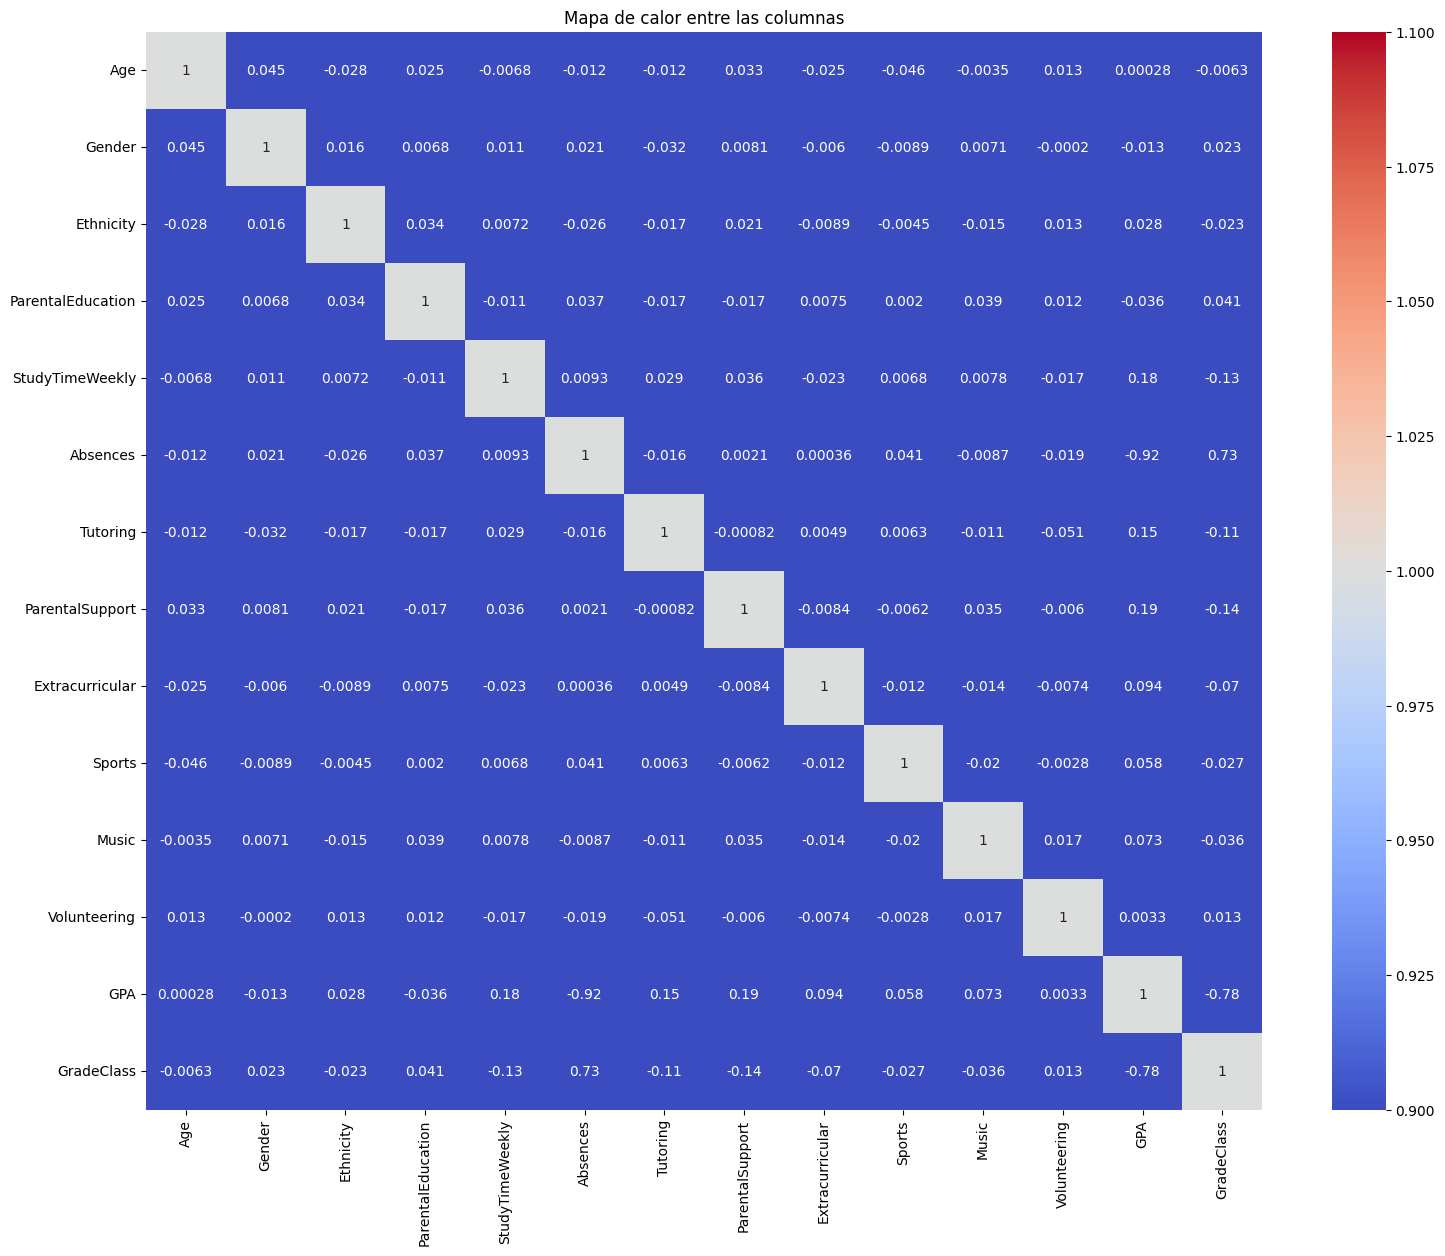

In [20]:
#mapa de calor de la correlacion de columnas
plt.figure(figsize=(18,14))
sns.heatmap(df_correlacion, annot=True, cmap='coolwarm', vmin=1,vmax=1)
plt.title('Mapa de calor entre las columnas')
plt.show()

Se logra apreciar que todas las columnas tienen correlación negativa entre ellas.

In [21]:
# Se crean distintos dataframes para graficar
df_ausencias = df['Absences'].value_counts().sort_index()
df_gpa = df['GPA']
df_edad = df['Age'].value_counts()
df_genero = df['Gender'].value_counts()
df_etnia = df['Ethnicity'].value_counts()
df_edPadres = df['ParentalEducation'].value_counts()
df_apoyoPadres = df['ParentalSupport'].value_counts()
df_tutorias = df['Tutoring'].value_counts()
df_clasificacion = df['GradeClass'].value_counts()
df_ausencias

Absences
0     67
1     85
2     69
3     79
4     69
5     83
6     88
7     86
8     91
9     67
10    61
11    71
12    92
13    93
14    84
15    87
16    79
17    81
18    79
19    90
20    90
21    83
22    71
23    86
24    81
25    93
26    80
27    84
28    54
29    69
Name: count, dtype: int64

Text(0.5, 1.0, 'Ausencias acumuladas por cantidad de estudiantes en el año')

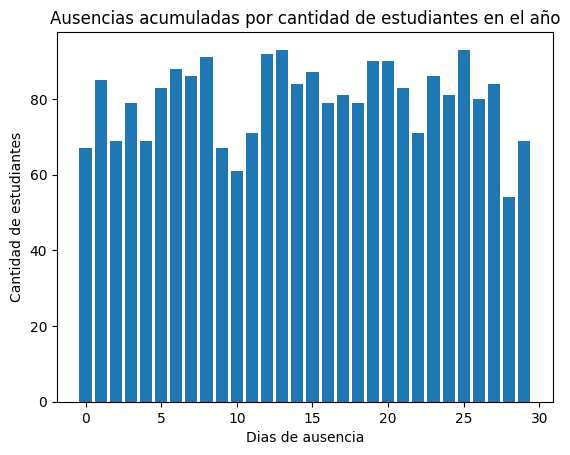

In [22]:
# Gráfico que muestra las ausencias de los estudiantes
fig, ax = plt.subplots()
ax.bar(df_ausencias.index, df_ausencias)
ax.set_xlabel('Dias de ausencia')
ax.set_ylabel('Cantidad de estudiantes')
ax.set_title('Ausencias acumuladas por cantidad de estudiantes en el año')

In [23]:
# Se crean distintos dataframes con actividades extracurriculares de los estudiantes
df_extracurricular1 = df[['Extracurricular','Music']].groupby(by=['Extracurricular','Music']).size().reset_index(name='Cantidad')
df_extracurricular1 = df_extracurricular1.rename(columns={'Extracurricular': 'Talleres','Music': 'Música','Cantidad':'Numero de estudiantes'})
df_extracurricular2 = df[['Extracurricular','Sports']].groupby(by=['Extracurricular','Sports']).size().reset_index(name='Cantidad')
df_extracurricular2= df_extracurricular2.rename(columns={'Extracurricular': 'Talleres','Sports':'Deportes','Cantidad':'Numero de estudiantes'})
df_extracurricular3 = df[['Extracurricular','Volunteering']].groupby(by=['Extracurricular','Volunteering']).size().reset_index(name='Cantidad')
df_extracurricular3 = df_extracurricular3.rename(columns={'Extracurricular': 'Talleres','Volunteering':'Voluntariado','Cantidad':'Numero de estudiantes'})


In [24]:
df_extracurricular1

,Talleres,Música,Numero de estudiantes
0,0,0,1178
1,0,1,297
2,1,0,743
3,1,1,174


In [25]:
df_extracurricular2

,Talleres,Deportes,Numero de estudiantes
0,0,0,1021
1,0,1,454
2,1,0,645
3,1,1,272


In [26]:
df_extracurricular3

,Talleres,Voluntariado,Numero de estudiantes
0,0,0,1240
1,0,1,235
2,1,0,776
3,1,1,141


## Gráficos para cada dataframe de actividades

<Axes: xlabel='Talleres', ylabel='Numero de estudiantes'>

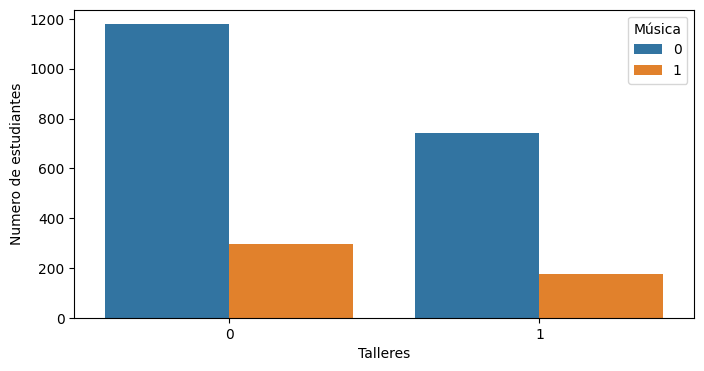

In [27]:
# Primer grafico de barras
plt.figure(figsize=(8,4))
sns.barplot(x='Talleres', y='Numero de estudiantes', hue='Música', data=df_extracurricular1)


<Axes: xlabel='Talleres', ylabel='Numero de estudiantes'>

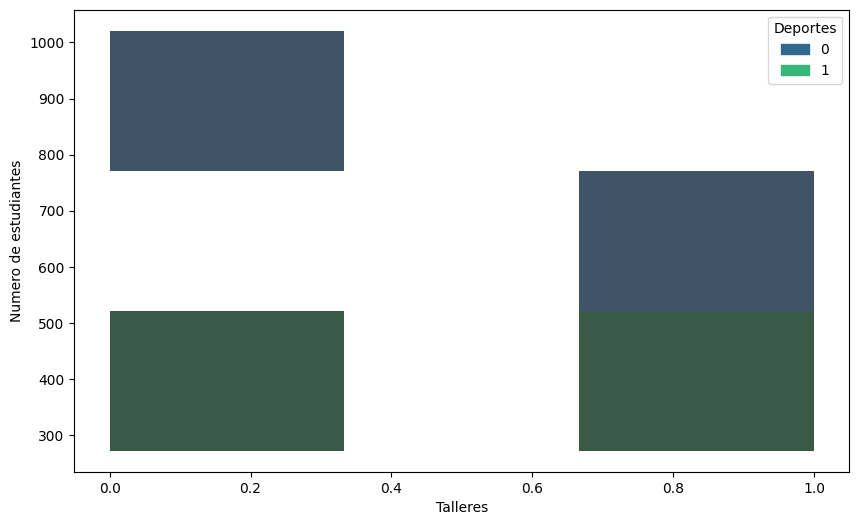

In [28]:
#En este caso se usa un historigrama a modo de ejemplo
plt.figure(figsize=(10,6))

sns.histplot(x='Talleres', y='Numero de estudiantes', hue='Deportes', data=df_extracurricular2, palette='viridis')

Se logra apreciar que no es el mejor gráfico para estos casos

<Axes: xlabel='Talleres', ylabel='Numero de estudiantes'>

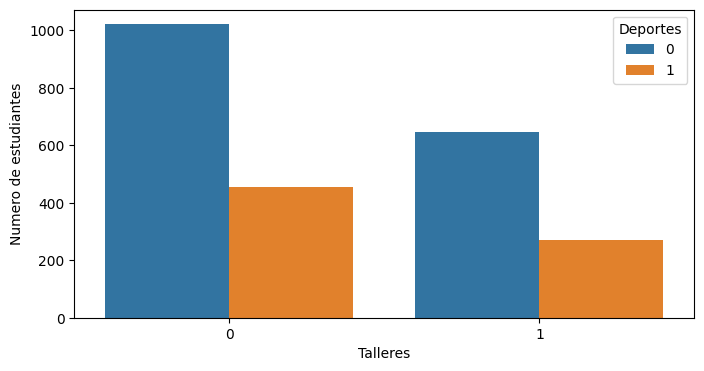

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(x='Talleres', y='Numero de estudiantes', hue='Deportes', data=df_extracurricular2)

<Axes: xlabel='Talleres', ylabel='Numero de estudiantes'>

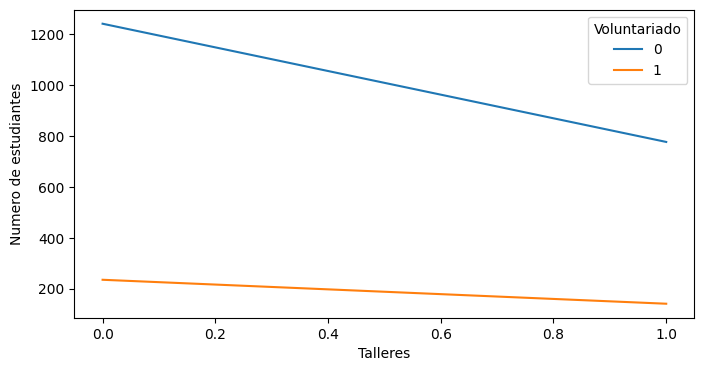

In [30]:
#En este caso se utiliza un grafico de linea
plt.figure(figsize=(8,4))
sns.lineplot(x='Talleres', y='Numero de estudiantes', hue='Voluntariado', data=df_extracurricular3)

Igual que en el caso anterior se aprecia que no es lo mejor para observar este tipo de dato

<Axes: xlabel='Talleres', ylabel='Numero de estudiantes'>

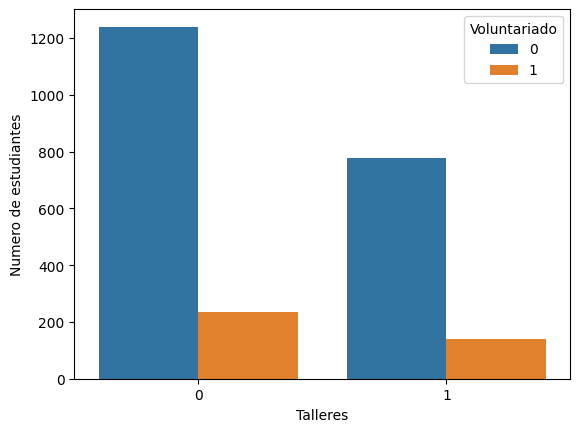

In [31]:
sns.barplot(x='Talleres', y='Numero de estudiantes', hue='Voluntariado', data=df_extracurricular3)

In [32]:
df_tiempoVscalificaciones = df[['GPA','StudyTimeWeekly']].groupby(by=['GPA','StudyTimeWeekly']).size().reset_index(name='Cantidad')
df_tiempoVscalificaciones

,GPA,StudyTimeWeekly,Cantidad
0,0.0,0.008031,1
1,0.0,0.112626,1
2,0.0,0.162164,1
3,0.0,0.237427,1
4,0.0,0.767231,1
...,...,...,...
2387,4.0,17.442121,1
2388,4.0,18.656924,1
2389,4.0,18.899696,1
2390,4.0,18.921512,1


<Axes: xlabel='GPA', ylabel='StudyTimeWeekly'>

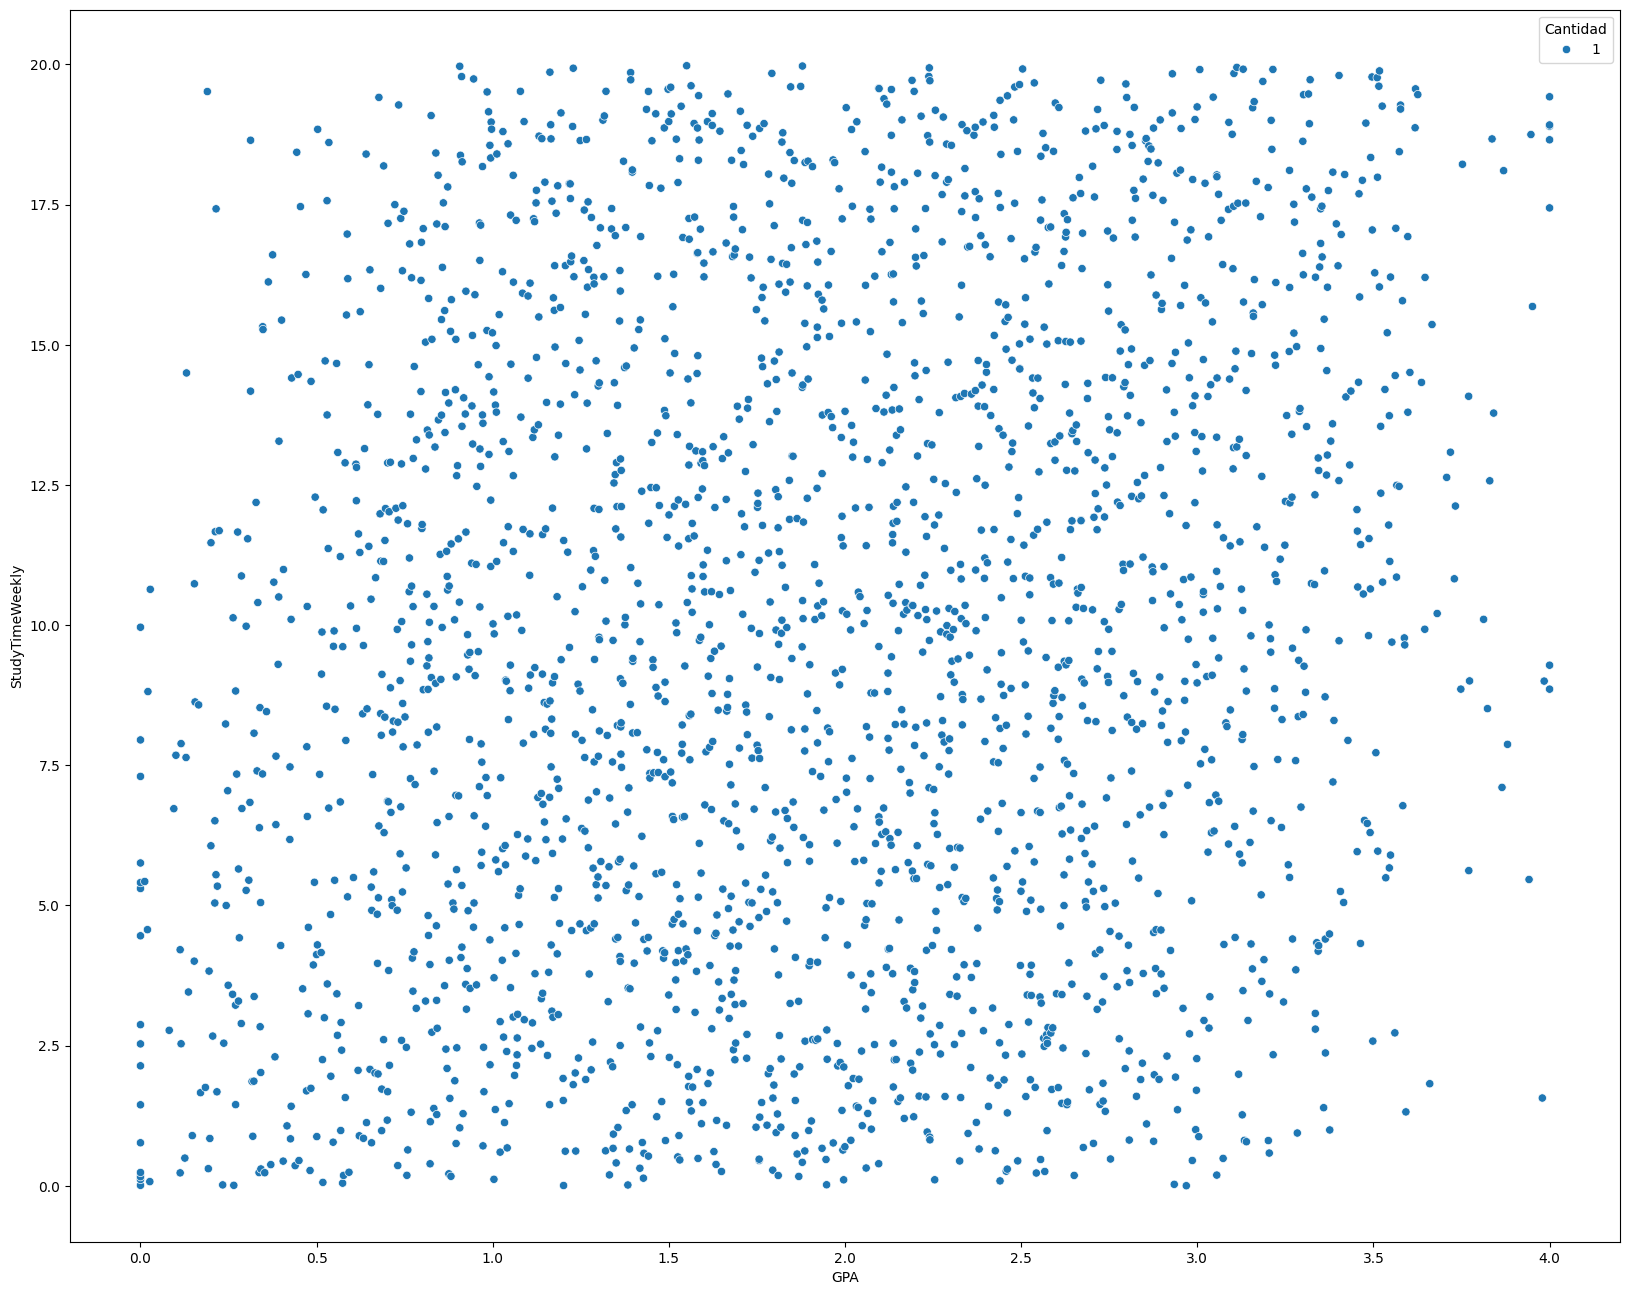

In [33]:
# Gráfico de dispersión
plt.figure(figsize=(20,16))
sns.scatterplot(x='GPA',y='StudyTimeWeekly',hue='Cantidad',data=df_tiempoVscalificaciones)

<function matplotlib.pyplot.show(close=None, block=None)>

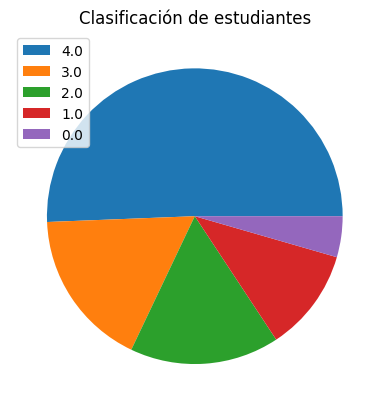

In [34]:
# Grafico de torta para la clasificación de los estudiantes
fig, ax = plt.subplots()
ax.pie(df_clasificacion)
ax.set_title('Clasificación de estudiantes')
ax.legend(df_clasificacion.index, loc='upper left')
plt.show


### Modelado


In [35]:
# Separar características y variable objetivo
X = df.drop(columns=[ 'GradeClass'])
y = df['GradeClass']

In [36]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Crear y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Regresión Lineal:")
print(f"MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")

Regresión Lineal:
MSE: 0.65, R^2: 0.59


In [38]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")


Random Forest:
MSE: 0.46, R^2: 0.71


In [39]:
# Crear y entrenar el modelo de KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print(f"MSE: {mse_knn:.2f}, R^2: {r2_knn:.2f}")


K-Nearest Neighbors:
MSE: 0.72, R^2: 0.55


In [40]:
# Crear y entrenar el modelo de XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"MSE: {mse_xgb:.2f}, R^2: {r2_xgb:.2f}")


XGBoost:
MSE: 0.52, R^2: 0.67


In [41]:
# Resumen de métricas
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'KNN', 'XGBoost'],
    'MSE': [mse_linear, mse_rf, mse_knn, mse_xgb],
    'R^2': [r2_linear, r2_rf, r2_knn, r2_xgb]
})

print("\nResumen de Resultados:")
print(results)


Resumen de Resultados:
             Modelo       MSE       R^2
0  Regresión Lineal  0.648613  0.591627
1     Random Forest  0.464804  0.707355
2               KNN  0.721560  0.545699
3           XGBoost  0.518978  0.673246


Respecto a los resultados de MSE y R2 elegimos el modelo de Random Forest.
debido a que el R2 es el mas cercano a 1 y MSE es el mas cercano a 0.

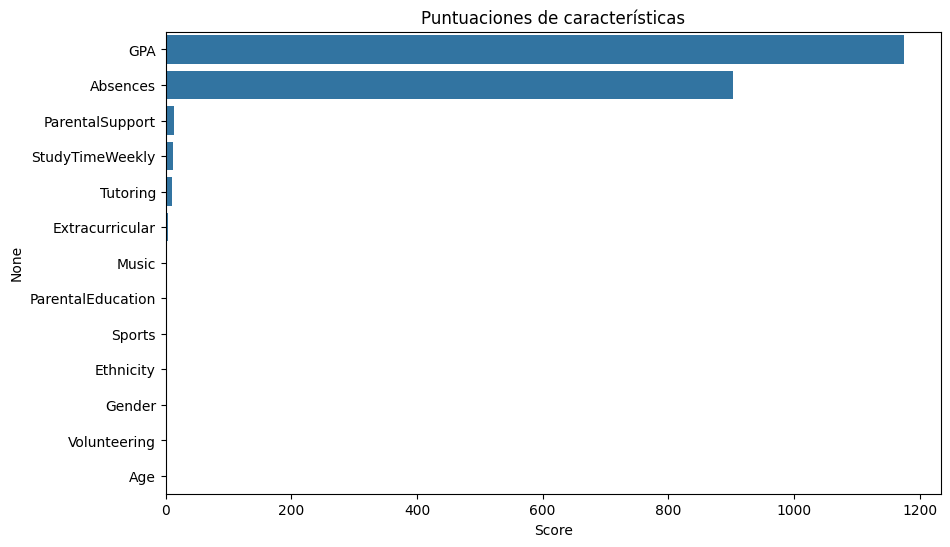

In [42]:
# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Obtener el marco de datos de las puntuaciones
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
scores = scores.sort_values(by='Score', ascending=False)

# Visualizar las puntuaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=scores['Score'], y=scores.index)
plt.title('Puntuaciones de características')
plt.show()

# Elegir características con score alto (ej. los 5 mejores)
top_features = scores.head(5).index.tolist()

Con esto se identifica que las caracteristicas que alcanzan mayores valores son el promedio de calificaciones(GPA) y las ausencias(Absences),identificando que son las que tienen mayor relacion con las calificaciones de los estudiantes, ademas, en menor medida el apoyo de los padres(ParentalSupport), tiempo de estudio semanal(StudyTimeWeekly) y la tutoria(Tutoring).

In [43]:



# Inicializar y entrenar el clasificador
model = RandomForestClassifier(random_state=45)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=45)

In [44]:
# Predecir el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.38      0.56        39
         1.0       0.80      0.84      0.82        82
         2.0       0.93      0.92      0.92       108
         3.0       0.90      0.90      0.90       134
         4.0       0.93      0.98      0.95       355

    accuracy                           0.91       718
   macro avg       0.91      0.80      0.83       718
weighted avg       0.91      0.91      0.90       718



Conclusiones:
El modelo tiene un buen rendimiento.


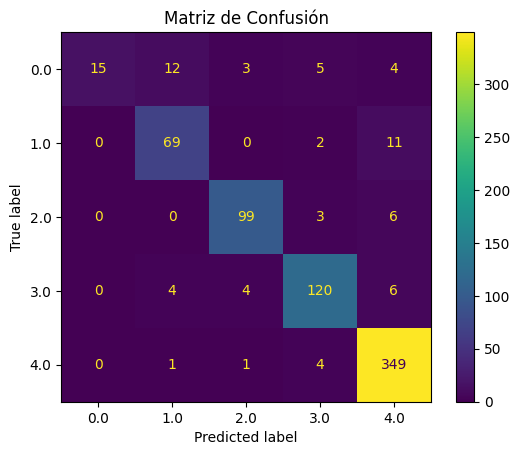

In [45]:
# Conclusiones basadas en las métricas
if accuracy >= 0.8:
    conclusion = "El modelo tiene un buen rendimiento."
elif accuracy >= 0.6:
    conclusion = "El modelo tiene un rendimiento aceptable, pero se puede mejorar."
else:
    conclusion = "El modelo tiene un rendimiento pobre y necesita ajustes."

print("Conclusiones:")
print(conclusion)

# Visualizar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Matriz de Confusión')
plt.show()

Gracias a los resultados obtenidos se puede decir que se tuvo un buen rendimiento y que los valores de prediccion se mueven hacia los verdaderos negativos.